<strong/><font size=4>DATA 601 Project 2 </strong>

<strong/>Project Objective:</strong>
Estimation of obesity levels based on eating habits and physical condition Data Set.
This dataset includes data for estimating obesity levels in individuals from Mexico, Peru, and Colombia, based on their eating habits and physical condition.

<strong/>Data Sources:</strong>
The dataset is from the UC Irvine Machine Learning Repository website.<br>
Data download link:<Br>
https://archive.ics.uci.edu/ml/machine-learning-databases/00544/<br>
From:<br>
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#<br>

Country: Mexico, Peru, and Colombia
Population: People from Mexico, Peru, and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. 

<strong/>Data Description:</strong><br>
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub <br>
“The dataset is obtaining 17 attributes and 2111 records. The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. All data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.” (Palechor, 2019)

<strong/>Collection Method:</strong>
According to Palechor states in the data attributes description, the data collected using a web platform with an anonymous survey. The survey contains questions asking the users to fulfill their gender, age, height, weight, eating habits, and physical condition. 


References:
[1]Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.<br>
[2]De-La-Hoz-Correa, E., Mendoza Palechor, F., De-La-Hoz-Manotas, A., Morales Ortega, R., & SÃ¡nchez HernÃ¡ndez, A. B. (2019). Obesity level estimation software based on decision trees.<br>
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub



<strong/><font size=3>Motivation:</strong><br>
Overweight and obesity becomes a growing concern, especially that obesity is a common, severe, and costly disease.<br> Being overweight is a problem, but people with insufficient weight also face some difficulties.<br>
Keeping a healthy weight is essential for everyone; weight can depend on eating habits, physical condition, and other life habits as well.<br>


<strong/><font size = 3>The Hypothesis:</strong>
- For people who consume alcohol, males have a higher chance of being overweight and obese than females.
- Smoking can increase the chance of being overweight and obese. 
- People with a family history of overweight have a higher risk of being overweight and obese.

<strong/><font size = 3>Observational study:</strong>
- Clean up the data
- Summarize the data
- Visualize the relationship between selected attributes
- Compare the outcomes and check if they support the hypothesis
- Conclude the research questions

<strong/><font size=4>Exploratory Data Analysis with Hypothesis</strong>


<strong/>Import modules

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import xlrd  
import urllib
import zipfile

<strong/>Download dataset and upload to google drive

In [104]:
# uploaded the original dataset to google drive
url = "https://drive.google.com/file/d/1NTbBkvUtYM7vJSkNEvG3ONDpDJphMc2R/view?usp=sharing"

<strong/>Read the csv file from google drive

In [124]:
# https://stackoverflow.com/a/62592638
import pandas as pd

url = "https://drive.google.com/file/d/1NTbBkvUtYM7vJSkNEvG3ONDpDJphMc2R/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

# change the column names
df.columns =['Gender', 'Age','Height','Weight','FamHist_overweight',
             'Freq_HighCalFood','Freq_Veggie','Num_MainMeals',
             'FoodBetweenMeals','Smoke','WaterIntake','MonitoringCal',
             'Physical_Activity','Time_TechDeivce','Alcohol','Transportation',
             'OverWeight/Obesity_Type']

<strong/>The attributes related with eating habits are:</strong> <br>
- Gender<br>
- Age<br>
- Height(Numeric value in meters)<br>
- Weight(Numeric value in kilograms)<br>
- FamHist_overweight: Family history of Overweight<br>
- Freq_HighCalFood:   Frequent consumption of high caloric food<br>
- Freq_Veggie:        Frequent consumption of vegetables <br>
- Num_MainMeals:      Number of main meals  <br>
- FoodBetweenMeals:   Consumption of food between meals <br>
- Smoke:              Frequent consumption of smoking<br>
- WaterIntake:        Consumption of water daily(Numeric value in liter)<br>
- MonitoringCal:      Calories consumption monitoring<br>
- Physical_Activity:  Physical activity frequency(frequency in days)<br>
- Time_TechDeivce:    Time using technology devices(Numeric value in hours)<br>
- Alcohol:            Consumption of alcohol<br> 
- Transportation:     Transportation used <br>
- OverWeight/Obesity_Type:<br>Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

<strong/>Dispaly dataset 

In [125]:
df

,Gender,Age,Height,Weight,FamHist_overweight,Freq_HighCalFood,Freq_Veggie,Num_MainMeals,FoodBetweenMeals,Smoke,WaterIntake,MonitoringCal,Physical_Activity,Time_TechDeivce,Alcohol,Transportation,OverWeight/Obesity_Type
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [126]:
# size of dataframe
df.shape

(2111, 17)

This dataset cotains 2111 people's information.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2111 non-null   object 
 1   Age                      2111 non-null   float64
 2   Height                   2111 non-null   float64
 3   Weight                   2111 non-null   float64
 4   FamHist_overweight       2111 non-null   object 
 5   Freq_HighCalFood         2111 non-null   object 
 6   Freq_Veggie              2111 non-null   float64
 7   Num_MainMeals            2111 non-null   float64
 8   FoodBetweenMeals         2111 non-null   object 
 9   Smoke                    2111 non-null   object 
 10  WaterIntake              2111 non-null   float64
 11  MonitoringCal            2111 non-null   object 
 12  Physical_Activity        2111 non-null   float64
 13  Time_TechDeivce          2111 non-null   float64
 14  Alcohol                 

<strong/>Find all null values

In [128]:
print(" \nTotal NaN in a DataFrame : \n\n", 
       df.isna().sum().sum()) 

 
Total NaN in a DataFrame : 

 0


- Since there is no NaN cell, the dataset is clean and ready to analyze.

In [129]:
# detail of numerical columns in the dataset
df.describe()

,Age,Height,Weight,Freq_Veggie,Num_MainMeals,WaterIntake,Physical_Activity,Time_TechDeivce
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<strong/>Explaination:</strong><br>
- The average of age in this dataset is 24 years old.
- The avergae of height is 1.70m (5.58ft).
- The average of weight is 86.59kg

<strong/>Count the numbers for each weight type

In [130]:
df['OverWeight/Obesity_Type'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: OverWeight/Obesity_Type, dtype: int64

<Strong/>Plot Count by Weight Types

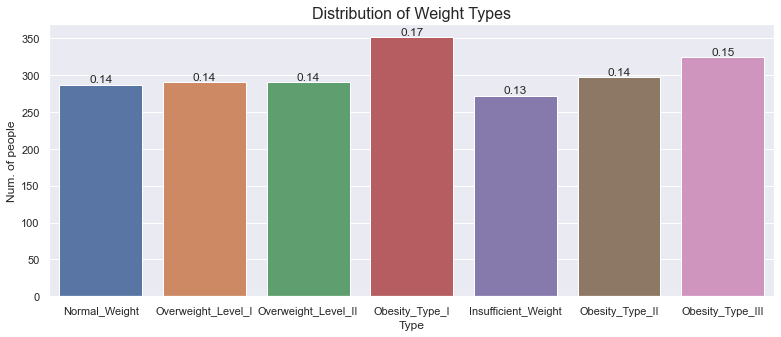

In [131]:
fig= plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
total = float(len(df))

ax = sns.countplot(x="OverWeight/Obesity_Type", data=df)

# function for display the percentage of each group of weight type
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
plt.title('Distribution of Weight Types',fontsize=16)
plt.xlabel('Type')
plt.ylabel('Num. of people')
plt.show()

<strong/>Explaination:<br></strong>
17% of total 2111 people are in the Type I obesity group.<br>
15% of total 2111 people are in the Type III Obesity group.<br>
14% for each of Type II, Level I, II and Normal weight group.<br>
13% of total 2111 people are in the Insufficient Weight group.

<strong/><font size=3>Plot for Weight Types by Age</strong>

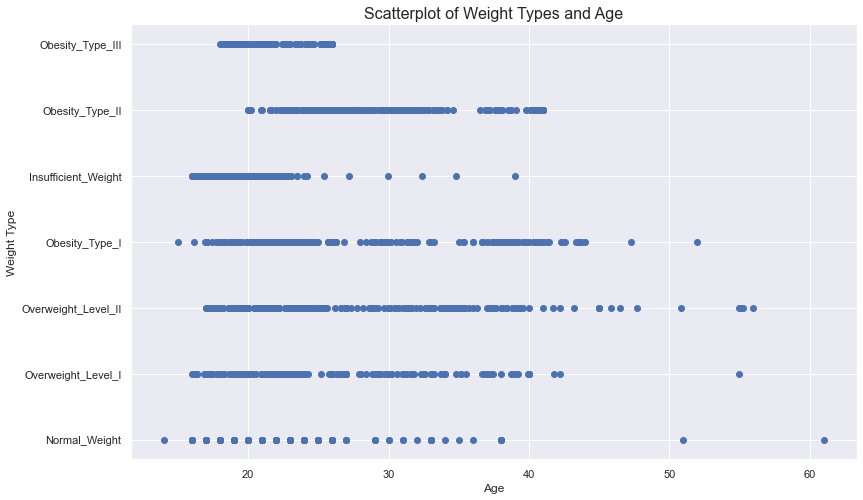

In [148]:
plt.figure(figsize=(13,8))
plt.scatter(x = df["Age"], y=df["OverWeight/Obesity_Type"],marker ="o")
plt.title("Scatterplot of Weight Types and Age",fontsize=16)
plt.ylabel("Weight Type")
plt.xlabel("Age")
plt.show()

<Strong/>Explaination:</strong>
- From this graph we can see that large amount of people with overweight and obese are from 16 to 45 years old.

    

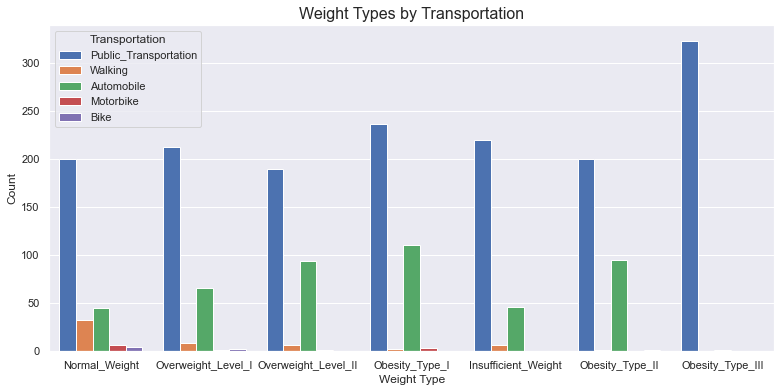

In [161]:
plt.figure(figsize=(13,6))
sns.set(style="darkgrid")

ax = sns.countplot(x='OverWeight/Obesity_Type',hue='Transportation',data=df, saturation=1)

ax.set_title('Weight Types by Transportation',fontsize=16)
ax.set_xlabel('Weight Type')
ax.set_ylabel('Count')
plt.show()

<Strong/>Explaination:</strong>
- From this graph we can see people using public transportation have the high chance to become overweight and obese.
- The second high risk group are people using automobile.

<strong/><font size=4>Hypothesis: </strong><br>

1.For people who consume alcohol, males have a higher chance of being overweight and obese than females. <br>

2.Smoking can increase the chance of being overweight and obese. <br>

3.People with a family history of overweight have a higher risk of being overweight and obese.

<strong/><font size=3>Hypothesis 1<br>
For people who consume alcohol, males have a higher chance of being overweight and obese than females.

Usually, people might think drinking alcohol can increase the chance of becoming overweight, especially for males.<br>
So the first hypothesis is to test whether males who consume alcohol can have a high risk of being overweight or not.<br> First, we start with checking the weight distribution by gender.

In [36]:
# Check the weight types groupby gender
df_by_gender = df.groupby(['OverWeight/Obesity_Type','Gender']).size()
print (df_by_gender)

OverWeight/Obesity_Type  Gender
Insufficient_Weight      Female    173
                         Male       99
Normal_Weight            Female    141
                         Male      146
Obesity_Type_I           Female    156
                         Male      195
Obesity_Type_II          Female      2
                         Male      295
Obesity_Type_III         Female    323
                         Male        1
Overweight_Level_I       Female    145
                         Male      145
Overweight_Level_II      Female    103
                         Male      187
dtype: int64


In [37]:
# plot weight distribution groupby gender 

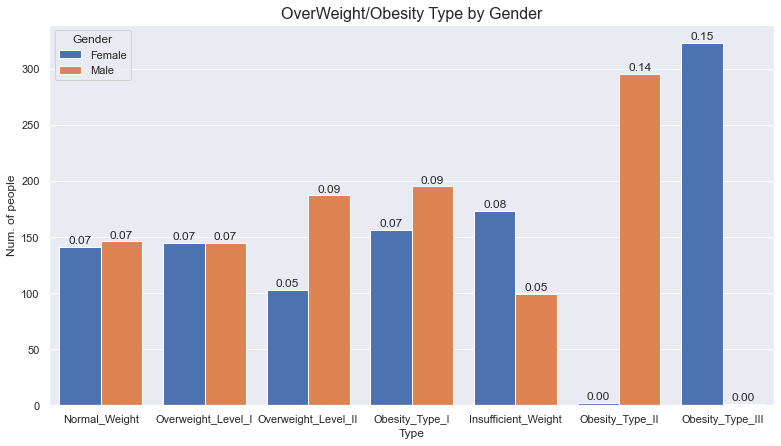

In [38]:
plt.figure(figsize=(13,7))
sns.set(style="darkgrid")
total = float(len(df))

ax = sns.countplot(x='OverWeight/Obesity_Type',hue='Gender',data=df, saturation=1)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

ax.set_title('OverWeight/Obesity Type by Gender',fontsize=16)
ax.set_xlabel('Type')
ax.set_ylabel('Num. of people')
plt.show()

- Percentage of OverWeight/Obesity Males is:   39%.
- Percentage of OverWeight/Obesity Females is: 34%.
- The rest of 27% people are in the normal weight and the insufficient weight group.
- From this dataset, we can see that males have a higher chance of becoming overweight or obese than females in general.

<strong/><font size=3> Compare the Weight Type Related to Alcohol Consumption by Gender

Now we check the weight types with alcohol consumption grouped by gender.

In [17]:
# separate the dataset by gender
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']

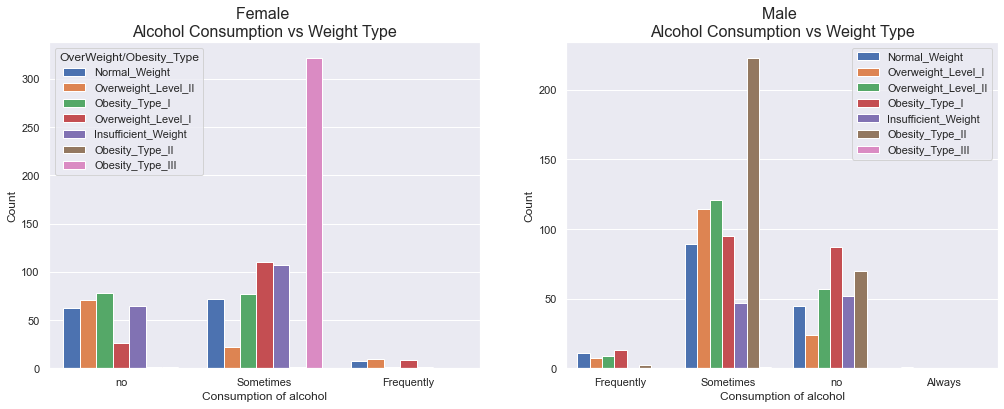

In [18]:
# plot the weight type with alcohol consumption by gender
fig, ax = plt.subplots(1,2,figsize=(17,6))
sns.set(style="darkgrid")

# plot for female
sns.countplot(x='Alcohol',hue='OverWeight/Obesity_Type',data=female_df,ax=ax[0], saturation=1)

ax[0].set_title('Female \nAlcohol Consumption vs Weight Type',fontsize=16)
ax[0].set_xlabel('Consumption of alcohol')
ax[0].set_ylabel('Count')

# plot for male
sns.countplot(x='Alcohol',hue='OverWeight/Obesity_Type',data=male_df,ax=ax[1], saturation=1)
ax[1].set_title('Male \nAlcohol Consumption vs Weight Type',fontsize=16)
ax[1].set_xlabel('Consumption of alcohol')
ax[1].set_ylabel('Count')

# move the legend in subplot 
plt.legend(loc=1)
plt.show()

<Strong/>Explaination: <br></strong>
- For people with No Alcohol Consumption:<br> 
The number of Overweight Levels I and II in the female group is higher than in the male group. <br>
But the female group has a much lower number in Type I and Type II Obesity than the male group.<br>


- For people with Sometimes Alcohol Consumption: <br> 
The number of Overweight Levels I, II, Type II Obesity for females are lower than males.<br> 
But the Type III Obesity has a large number(over 300) in the female group, compared with the male group with less than ten people with Type III Obesity. <br>


- For the male group, the Type II Obesity group has over 200 people, compared to the female group, which is less than ten people.



In [19]:
df_by_alcohol = df.groupby(['OverWeight/Obesity_Type','Gender','Alcohol']).size()
print (df_by_alcohol)

OverWeight/Obesity_Type  Gender  Alcohol   
Insufficient_Weight      Female  Frequently      1
                                 Sometimes     107
                                 no             65
                         Male    Sometimes      47
                                 no             52
Normal_Weight            Female  Frequently      7
                                 Sometimes      72
                                 no             62
                         Male    Always          1
                                 Frequently     11
                                 Sometimes      89
                                 no             45
Obesity_Type_I           Female  Frequently      1
                                 Sometimes      77
                                 no             78
                         Male    Frequently     13
                                 Sometimes      95
                                 no             87
Obesity_Type_II          Female  Somet

<strong/>Explaination:<br></strong>
- 552 people in the Female group with 'sometimes' and 'frequently' drink alcohol behaviors has overweight or obesity.<br>
- 585 people in the Male group with 'sometimes' and 'frequently' drink alcohol behaviors has overweight or obesity.

<strong/>Conslusion: </strong><br>
   - Since there are more males with alcohol consumption in the overweight and obesity groups than females, hence the hypothesis is True that males with alcohol consumption have a higher chance of being overweight and obese than females.

<strong/><font size=3>Hypothesis 2<br>
Smoking can increase the chance of being overweight and obese.


Commonly, people might think smoking could be bad for health, which might increase the chance of being overweight and obese.<br>In the second hypothesis, we will test whether smoking can affect peoples' overweight/obesity.

In [20]:
# Check the weight types grouped by smoking behavior

In [21]:
df_by_Smoke = df.groupby(['OverWeight/Obesity_Type','Smoke']).size()
df_by_Smoke

OverWeight/Obesity_Type  Smoke
Insufficient_Weight      no       271
                         yes        1
Normal_Weight            no       274
                         yes       13
Obesity_Type_I           no       345
                         yes        6
Obesity_Type_II          no       282
                         yes       15
Obesity_Type_III         no       323
                         yes        1
Overweight_Level_I       no       287
                         yes        3
Overweight_Level_II      no       285
                         yes        5
dtype: int64

In [22]:
# plot weight distribution groupby consumption of smoking

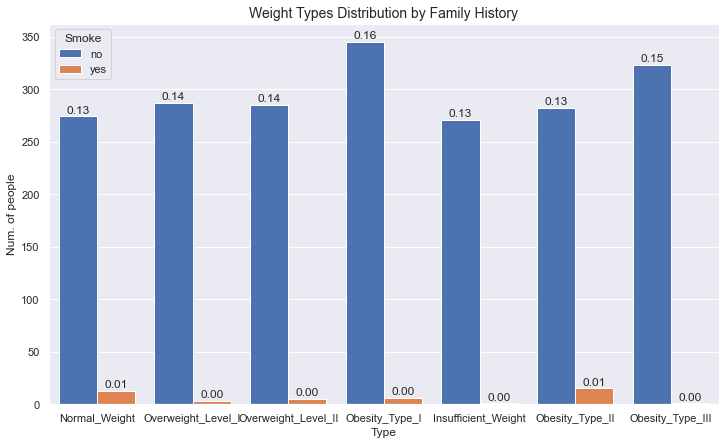

In [23]:
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
total = float(len(df))

ax = sns.countplot(x='OverWeight/Obesity_Type',hue='Smoke',data=df, saturation=1)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

ax.set_title('Weight Types Distribution by Family History',fontsize=14)
ax.set_xlabel('Type')
ax.set_ylabel('Num. of people')
plt.show()

<Strong/>Explaination:</strong><br>
- From this graph, we can see that only 30 people with smoking behavior are overweight or obese in this dataset, and it is 1.42% of the total of 2111 people in the dataset.

<strong/>Conclusion:</strong><br>
- The consumption of smoking does not affect the weight in this dataset.
- Hence the hypothesis is Not True. We failed to prove that smoking can increase the chance of being overweight and obese. 

<strong/><font size=3>Hypothesis 3<br>
People with a family history of overweight have a higher risk of being overweight and obese.

Many diseases are highly related with family history, overweight and obesity can be one of them. <br>For the third hypothesis,
we will do the test to see that if people with family histories of weight issues are more likely to have the same probelms.

In [24]:
# Check the weight types grouped by family history of overweight and obesity

In [25]:
df_by_FamHistory = df.groupby(['OverWeight/Obesity_Type','FamHist_overweight']).size()
df_by_FamHistory

OverWeight/Obesity_Type  FamHist_overweight
Insufficient_Weight      no                    146
                         yes                   126
Normal_Weight            no                    132
                         yes                   155
Obesity_Type_I           no                      7
                         yes                   344
Obesity_Type_II          no                      1
                         yes                   296
Obesity_Type_III         yes                   324
Overweight_Level_I       no                     81
                         yes                   209
Overweight_Level_II      no                     18
                         yes                   272
dtype: int64

In [26]:
# plot weight distribution grouped by family history or overweight and obesity

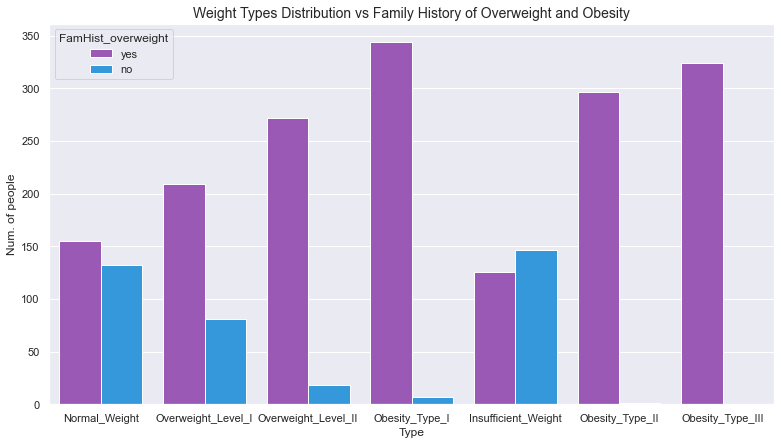

In [27]:
plt.figure(figsize=(13,7))
sns.set(style="darkgrid")

sns.countplot(x='OverWeight/Obesity_Type',hue='FamHist_overweight',palette=["#9b59b6","#3498db"],data=df,saturation=1)

plt.title('Weight Types Distribution vs Family History of Overweight and Obesity',fontsize=14)
plt.xlabel('Type')
plt.ylabel('Num. of people')
plt.show()

<Strong/>Explaination:</strong><br>
- From this graph, we can see that the group of people with a family history of overweight and obesity way large than the people without a family history, except for people in the insufficient weight group.

<strong/>Conclusion:</strong><br>

- Hence, the hypothesis is True, that people with a family history of overweight and obesity have a higher risk of being overweight/obese.

<strong/><font size=4>Conclusion</strong>:<br>

Hypothesis:

1.For people who consume alcohol, males have a higher chance of being overweight and obese than females.
- The hypothesis is True that males with alcohol consumption have a higher chance of being overweight and obese than females.

2.Smoking can increase the chance of being overweight and obese.
- The hypothesis is Not True. We failed to prove that smoking can increase the chance of being overweight and obese.
- But this is not proof of smoking can help reduce weight.

3.People with a family history of overweight have a higher risk of being overweight and obese.
- The hypothesis is True, that people with a family history of overweight and obesity have a higher risk of being overweight/obese.

<strong/>References:</strong><br>
https://www.geeksforgeeks.org/numpy-isnan-python/<br>
https://stackoverflow.com/questions/61000529/multiple-count-plots-in-seaborn<br>
https://stackoverflow.com/questions/41524240/how-to-separate-female-and-male-without-groupby-in-python<br>
https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots<br>
https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn<br>
https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn<br>


